## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.



### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.




In [29]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')
data_selected = data[data['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]

In [28]:

TARGET = 'median_house_value'
X = data_selected.drop(TARGET,axis = 1)
y = data_selected[TARGET]

X = X.fillna(0)
y = np.log1p(y)

df_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(df_full,y_full, test_size=0.2, random_state=1)

In [30]:
dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(X_train.to_dict(orient='records'))

X_val = dv.transform(X_val.to_dict(orient='records'))

X_test = dv.transform(X_test.to_dict(orient='records'))

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `ocean_proximity` +
* `total_rooms`
* `latitude`
* `population`




In [59]:
from sklearn import tree

In [57]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [58]:
np.array(dv.feature_names_)[model.feature_importances_ >0]

array(['ocean_proximity=<1H OCEAN'], dtype='<U25')

[Text(0.5, 0.75, 'ocean_proximity=<1H OCEAN <= 0.5\nsquared_error = 0.321\nsamples = 10039\nvalue = 12.01'),
 Text(0.25, 0.25, 'squared_error = 0.231\nsamples = 4189\nvalue = 11.607'),
 Text(0.75, 0.25, 'squared_error = 0.185\nsamples = 5850\nvalue = 12.299')]

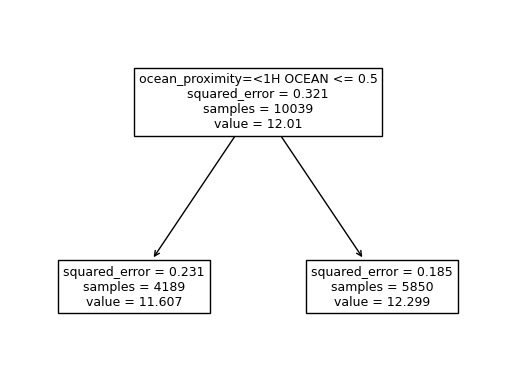

In [61]:
tree.plot_tree(model, feature_names=dv.feature_names_)

## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

* 0.045
* 0.245 +
* 0.545
* 0.845




In [64]:

model = RandomForestRegressor(n_estimators=10, random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=1)

In [68]:
mean_squared_error(y_val, model.predict(X_val), squared=False)

0.23839112505312185

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- 10
- 25
- 50
- 160 +

In [92]:
np.array(X_train)

array(<10039x10 sparse matrix of type '<class 'numpy.float64'>'
	with 90351 stored elements in Compressed Sparse Row format>, dtype=object)

In [73]:
metrics_dict = {}
for i in range(10,201,5):
    model = RandomForestRegressor(n_estimators=i, random_state=1,n_jobs=-1)
    model.fit(X_train, y_train)
    metric = mean_squared_error(y_val, model.predict(X_val), squared=False)
    metrics_dict[i] = round(metric,)
    print(f'estimator {i}')

estimator 10
estimator 15
estimator 20
estimator 25
estimator 30
estimator 35
estimator 40
estimator 45
estimator 50
estimator 55
estimator 60
estimator 65
estimator 70
estimator 75
estimator 80
estimator 85
estimator 90
estimator 95
estimator 100
estimator 105
estimator 110
estimator 115
estimator 120
estimator 125
estimator 130
estimator 135
estimator 140
estimator 145
estimator 150
estimator 155
estimator 160
estimator 165
estimator 170
estimator 175
estimator 180
estimator 185
estimator 190
estimator 195
estimator 200


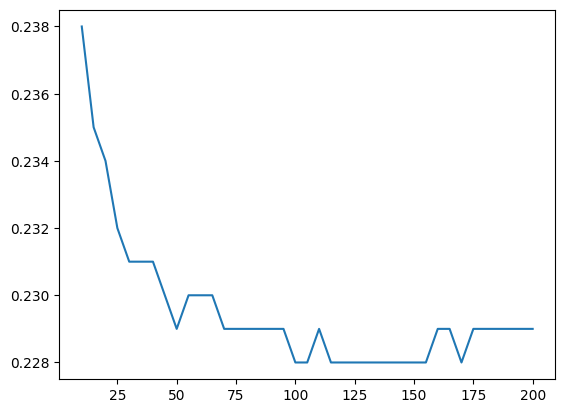

In [75]:
import matplotlib.pyplot as plt
plt.plot(metrics_dict.keys(), metrics_dict.values())

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20 +
* 25





In [71]:
metrics_dict_d = {}
for depth in range(10,26,5):
    mean_for_depth = []
    for n in range(10,201,10):
        model = RandomForestRegressor(n_estimators=n, max_depth = depth, random_state=1, n_jobs = -1)
        model.fit(X_train, y_train)
        metric = mean_squared_error(y_val, model.predict(X_val), squared=False)
        mean_for_depth.append(metric)
        print(f'depth {depth}, estimators {n}')
    metrics_dict_d[depth] = mean_for_depth

depth 10, estimators 10
depth 10, estimators 20
depth 10, estimators 30
depth 10, estimators 40
depth 10, estimators 50
depth 10, estimators 60
depth 10, estimators 70
depth 10, estimators 80
depth 10, estimators 90
depth 10, estimators 100
depth 10, estimators 110
depth 10, estimators 120
depth 10, estimators 130
depth 10, estimators 140
depth 10, estimators 150
depth 10, estimators 160
depth 10, estimators 170
depth 10, estimators 180
depth 10, estimators 190
depth 10, estimators 200
depth 15, estimators 10
depth 15, estimators 20
depth 15, estimators 30
depth 15, estimators 40
depth 15, estimators 50
depth 15, estimators 60
depth 15, estimators 70
depth 15, estimators 80
depth 15, estimators 90
depth 15, estimators 100
depth 15, estimators 110
depth 15, estimators 120
depth 15, estimators 130
depth 15, estimators 140
depth 15, estimators 150
depth 15, estimators 160
depth 15, estimators 170
depth 15, estimators 180
depth 15, estimators 190
depth 15, estimators 200
depth 20, estimato

In [79]:
{key: np.mean(val) for key,val in metrics_dict_d.items()}

{10: 0.2404209727951548,
 15: 0.23042784804128602,
 20: 0.22963087359408524,
 25: 0.22975486193378908}

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `total_rooms`
* `median_income` +
* `total_bedrooms`
* `longitude`




In [80]:
model = RandomForestRegressor(n_estimators=10, max_depth = 20, random_state=1, n_jobs = -1)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

<BarContainer object of 10 artists>

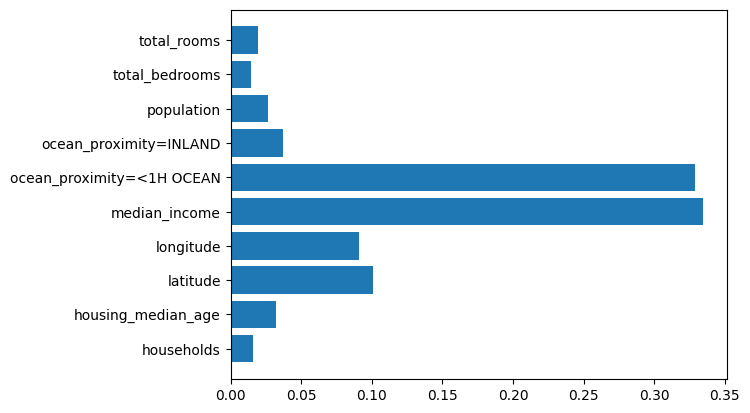

In [84]:
plt.barh(dv.feature_names_, model.feature_importances_)

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3 +
* 0.1
* Both give equal value





In [102]:
import xgboost as xgb

features = list(dv.get_feature_names_out())
features = [f.replace('<','') for f in features]
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

C:\Users\user\anaconda3\envs\ml-zoomcamp\lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


In [105]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [106]:
mean_squared_error(y_val, model.predict(dval))

0.04871778642469966

In [107]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)
mean_squared_error(y_val, model.predict(dval))

0.049853700880237994

## Submit the results

- Submit your results here: https://forms.gle/Qa2SuzG7QGZNCaoV9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 23 (Monday), 23:00 CET. After that the form will be closed.